In [2]:
from src.data_processing import HyperspectralImage, PerturbedSimpleData
from torch.utils.data import DataLoader
from src.models import Autoencoder
from src.train_utils import train_model
from src.conf import BATCH_SIZE
from src.loss_functions import balance_loss
import matplotlib.pyplot as plt

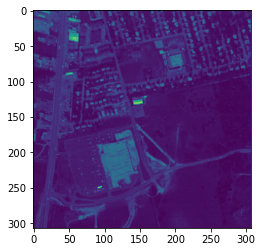

original_image_dataloader torch.Size([2, 162, 307, 307])


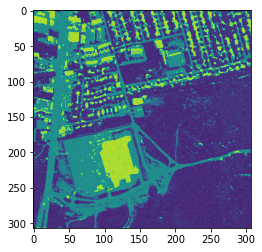

In [3]:
urban = HyperspectralImage(image_path="datasets/urban/Urban.mat",
                           ground_truth_path="datasets/urban/end6_groundTruth.mat",
                           n_bands=162, n_row=307, n_col=307, n_sources=6)

X_1_estim = np.load('results/first_estimation/X_1_estim.npy')
A_1_estim = np.load('results/first_estimation/A_1_estim.npy')
S_1_estim = np.load('results/first_estimation/S_1_estim.npy')

plt.imshow(urban.X[0])
plt.show()

pertubed_image_dataset = PerturbedSimpleData(urban, A_1_estim, S_1_estim)


pertubed_image_dataloader = DataLoader(dataset=pertubed_image_dataset, batch_size=BATCH_SIZE, shuffle=True)
a = next(iter(pertubed_image_dataloader))
print('original_image_dataloader', a["X"].shape)
plt.imshow(a['X'][0][50])
plt.show()

TRAINING WILL BE DONE ON cpu
 Epoch 1/50
----------------------------------------
Learning rate: 0.01


100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.15s/it]


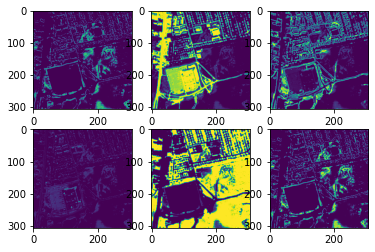

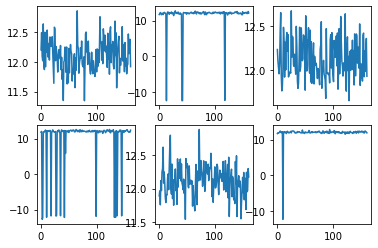

Loss: 1.8745
 Epoch 2/50
----------------------------------------
Learning rate: 0.01


100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.92s/it]


Loss: 0.6415
 Epoch 3/50
----------------------------------------
Learning rate: 0.01


  0%|                                                     | 0/1 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [4]:
model = Autoencoder(channel_number=urban.n_bands, source_number=urban.n_sources)
model, loss_train = train_model(model, urban.X,
                                      pertubed_image_dataloader,
                                      balance_loss, num_epochs=50, n_sources=6, need_plot=True)

In [ ]:
torch.save(model.state_dict(), "results/models_weights/urban_simple_perturbed_no_patches.pth")

X, A, S = model(torch.Tensor(urban.data[None, :, :, :])
X, A, S = X.detach().numpy()[0], A.detach().numpy(), S.detach().numpy()[0]
# Endmembers normalization
for i in range(A.shape[1]):
        M = A[:, i].max().item()
        A[:, i] = A[:, i]/M
                      
print('compare_endmembers', compare_endmembers(urban, A))
plt.figure(figsize=(8,6))
for ii in range(6): 
    ax = plt.subplot(2, 3, ii+1)
    ax.plot(A[:,ii])
plt.show()
                
print('compare_abundances', compare_abundances(urban, S))
plt.figure(figsize=(8,6))
for ii in range(6): 
    ax = plt.subplot(2, 3, ii+1)
    ax.imshow(S[ii, :, :])  
plt.show()
